In [1]:
%cd ..

/Users/crupley/gal/hoodie


In [198]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.interpolate import Rbf

from code.featurize import featurizer, bin_interpolate
from code.makedbs import get_db

In [4]:
f = featurizer()

# Walkscore: standard

In [3]:
f.add_features(['walkscore'])

/Users/crupley/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


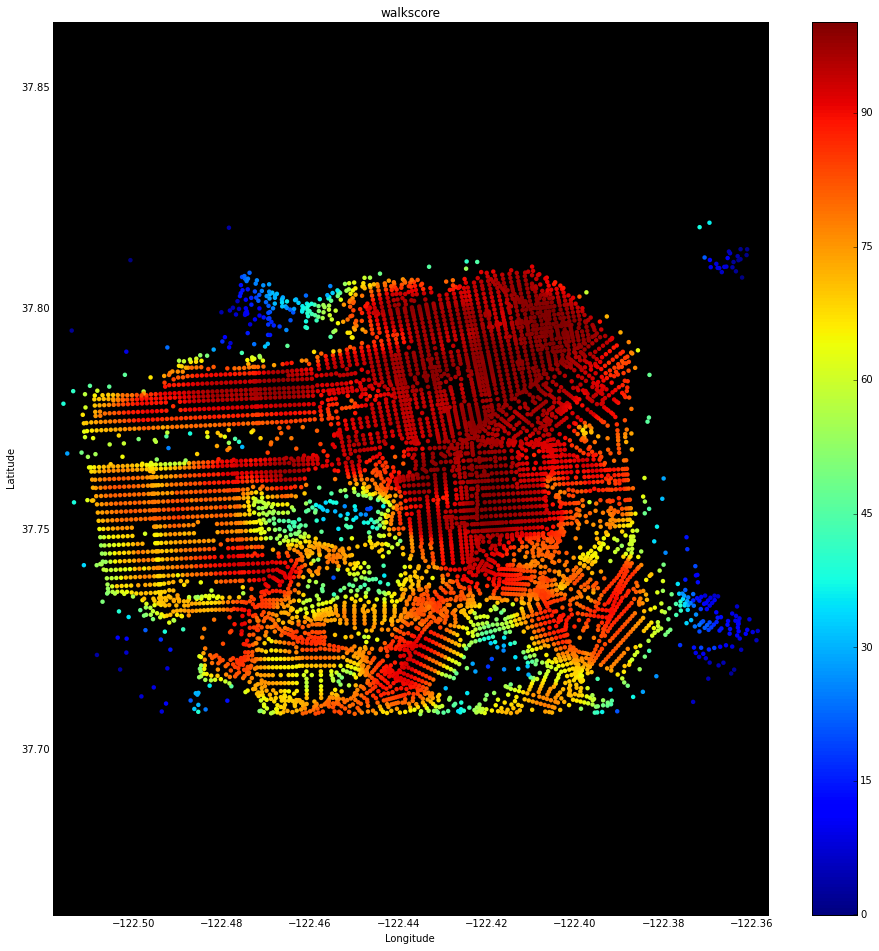

In [4]:
f.plot(['walkscore'])

# population

In [6]:
f.add_features(['usc_pop'])

In [7]:
%%time
rbf = Rbf(f.features.lon, f.features.lat, f.features.population,
          function='linear', smooth=1)
f.features['popsmooth'] = rbf(f.features.lon, f.features.lat)

CPU times: user 24.1 s, sys: 4.22 s, total: 28.4 s
Wall time: 15.4 s


/Users/crupley/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


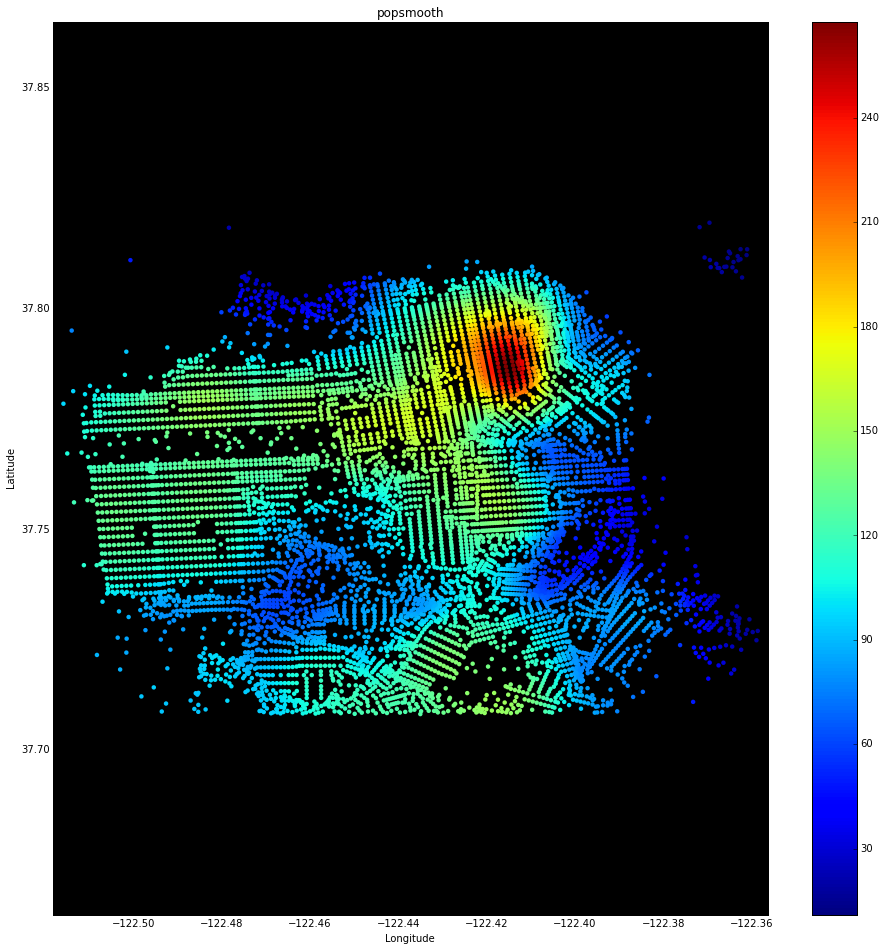

In [8]:
f.plot(['popsmooth'])

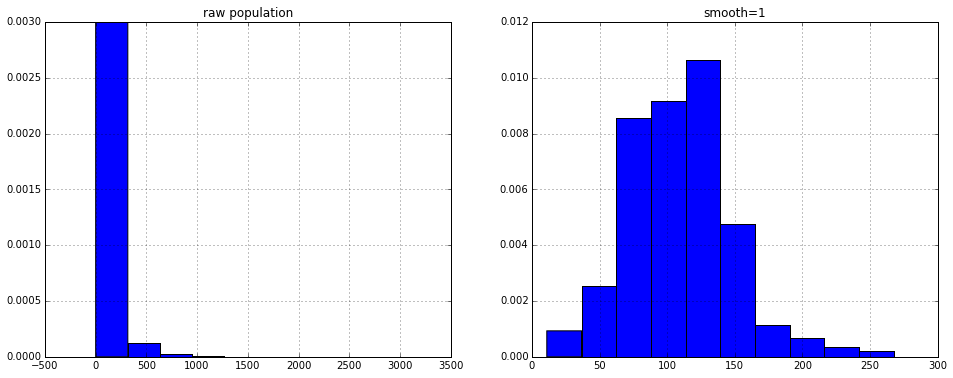

In [36]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
f.features.population.hist(normed=True)
plt.title('raw population')
plt.subplot(122)
f.features.popsmooth.hist(normed=True)
plt.title('smooth=1');


# household

In [24]:
f.add_features(['usc_household'])

In [28]:
%%time
rbf = Rbf(f.features.lon, f.features.lat, f.features.avg_hh_size,
          function='linear', smooth=.1)
f.features['housesmooth'] = rbf(f.features.lon, f.features.lat)

CPU times: user 24.3 s, sys: 5.45 s, total: 29.7 s
Wall time: 18.5 s


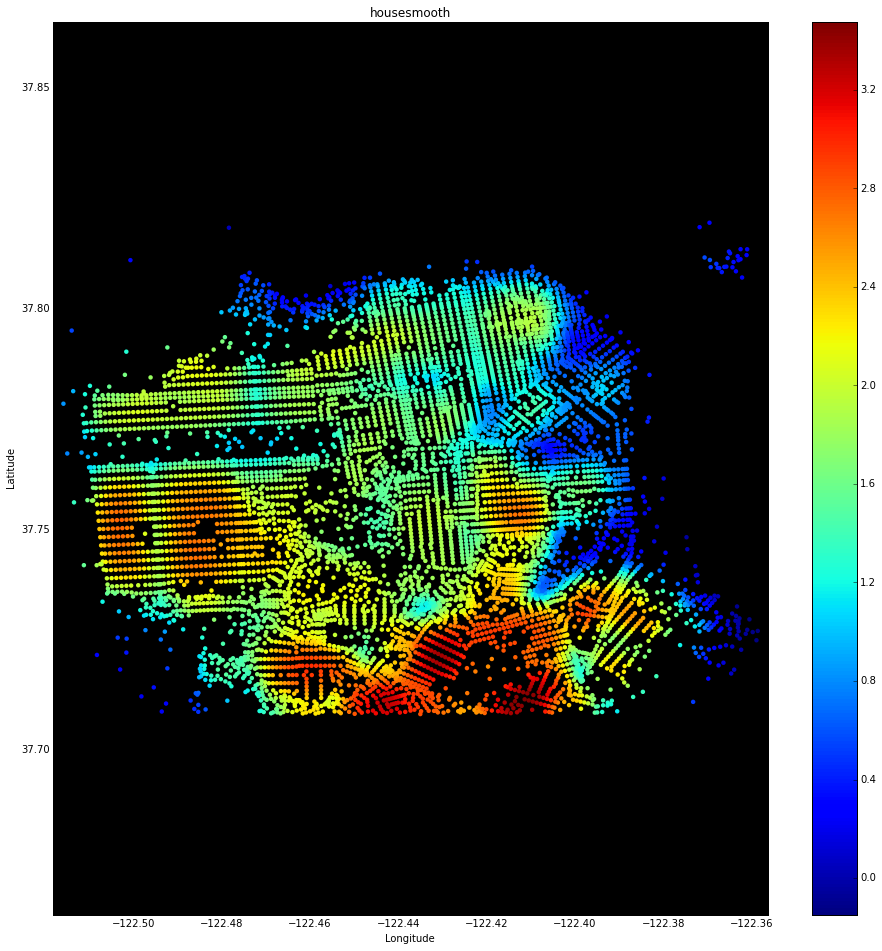

In [29]:
f.plot(['housesmooth'])

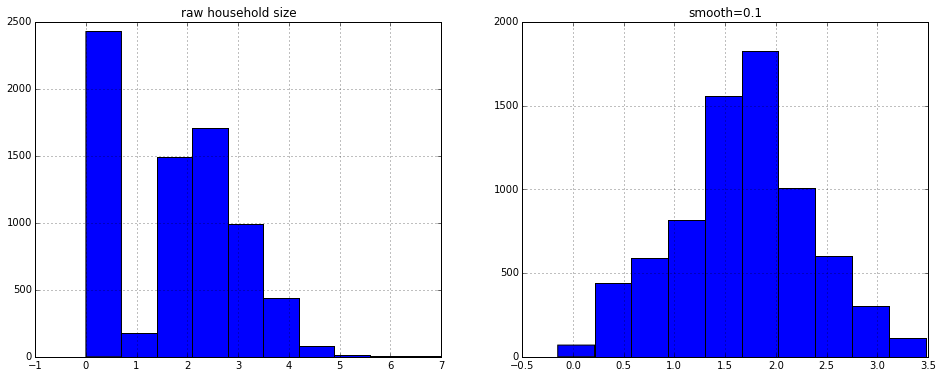

In [37]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
f.features.avg_hh_size.hist()
plt.title('raw household size')
plt.subplot(122)
f.features.housesmooth.hist()
plt.title('smooth=0.1');

# Gender

In [38]:
f.add_features(['usc_age_gender'])

In [58]:
%%time
rbf = Rbf(f.features.lon, f.features.lat, f.features.sgnf * f.features.popsmooth,
          function='linear', smooth=0.01)
f.features['sgnfs'] = rbf(f.features.lon, f.features.lat)

CPU times: user 25.3 s, sys: 6.82 s, total: 32.1 s
Wall time: 21.4 s


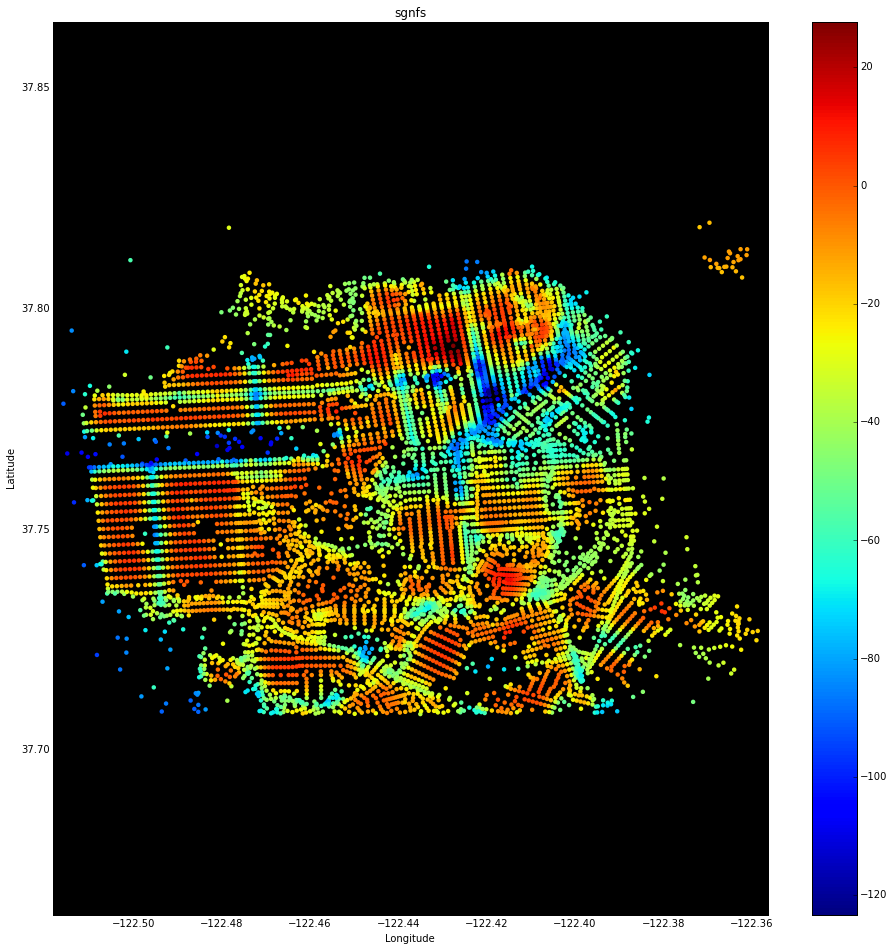

In [59]:
f.plot(['sgnfs'])

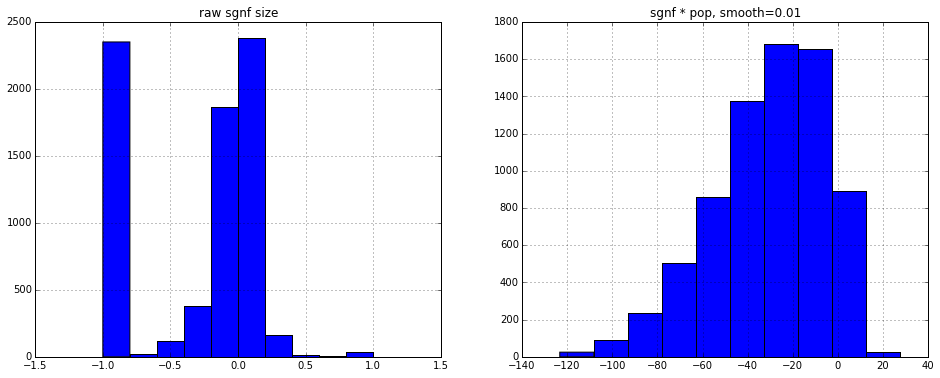

In [60]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
f.features.sgnf.hist()
plt.title('raw sgnf size')
plt.subplot(122)
f.features.sgnfs.hist()
plt.title('sgnf * pop, smooth=0.01');

In [62]:
hhdb = get_db('usc_age_gender')
hhdb.head()

block  block_group  tract             id2  total   m  m_u5  m_5_9  m_10_14  \
0    101            1   1000  60750101001000      0   0     0      0        0   
1    101            1   1001  60750101001001     44  31     0      0        1   
2    101            1   1002  60750101001002      0   0     0      0        0   
3    101            1   1003  60750101001003      0   0     0      0        0   
4    101            1   1004  60750101001004      1   0     0      0        0   

   m_15_17    ...      f_50_54  f_55_59  f_60_61  f_62_64  f_65_66  f_67_69  \
0        0    ...            0        0        0        0        0        0   
1        0    ...            1        1        0        0        1        0   
2        0    ...            0        0        0        0        0        0   
3        0    ...            0        0        0        0        0        0   
4        0    ...            0        0        0        0        0        0   

   f_70_74  f_75_79  f_80_84  f_85_over  
0        0        0        0          0  
1        0        0        0          0  
2        0        0        0          0  
3        0        0        0          0  
4        0        0        0          0  

[5 rows x 53 columns]

In [63]:
hhdb[['total', 'm', 'f']].sum(axis=0)

total    805235
m        408462
f        396773
dtype: int64

In [64]:
f.features.sgnfs.sum()

-224595.31715989305

# Crime

In [5]:
f.add_features(['sfpd'])

In [6]:
f.add_features(['usc_pop'])

In [27]:
df = (f.features.ncrimes / (f.features.population + 1))
df.describe()

count     7334.000000
mean       113.648571
std        428.114300
min       -193.555495
25%          0.863281
50%          2.650173
75%         71.523837
max      10197.878732
dtype: float64

In [19]:
%%time
rbf = Rbf(f.features.lon, f.features.lat, f.features.ncrimes,
          function='linear', smooth=0.1)
f.features['ncrimessm'] = rbf(f.features.lon, f.features.lat)

CPU times: user 24.1 s, sys: 5.7 s, total: 29.8 s
Wall time: 20.7 s


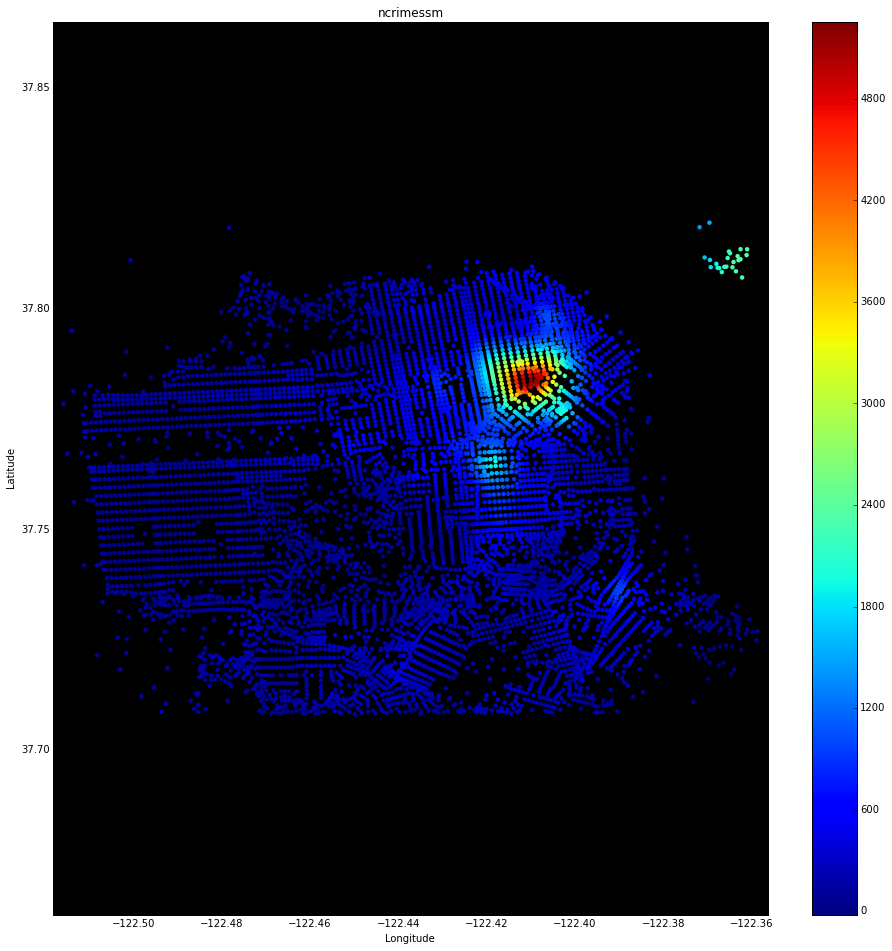

In [20]:
f.plot(['ncrimessm'])

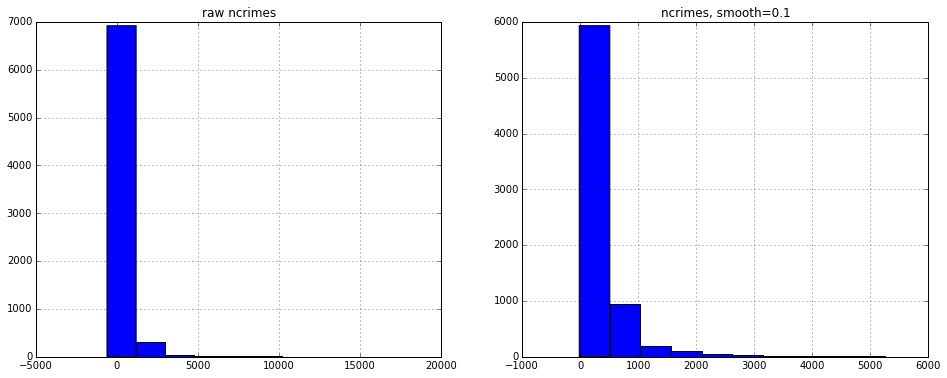

In [22]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
f.features.ncrimes.hist()
plt.title('raw ncrimes')
plt.subplot(122)
f.features.ncrimessm.hist()
plt.title('ncrimes, smooth=0.1');

# retail

In [23]:
f.add_features(['business'])

In [38]:
rbf = Rbf(f.features.lon, f.features.lat, f.features.retail,
          function='linear', smooth=0.3)
f.features['retailsm'] = rbf(f.features.lon, f.features.lat)

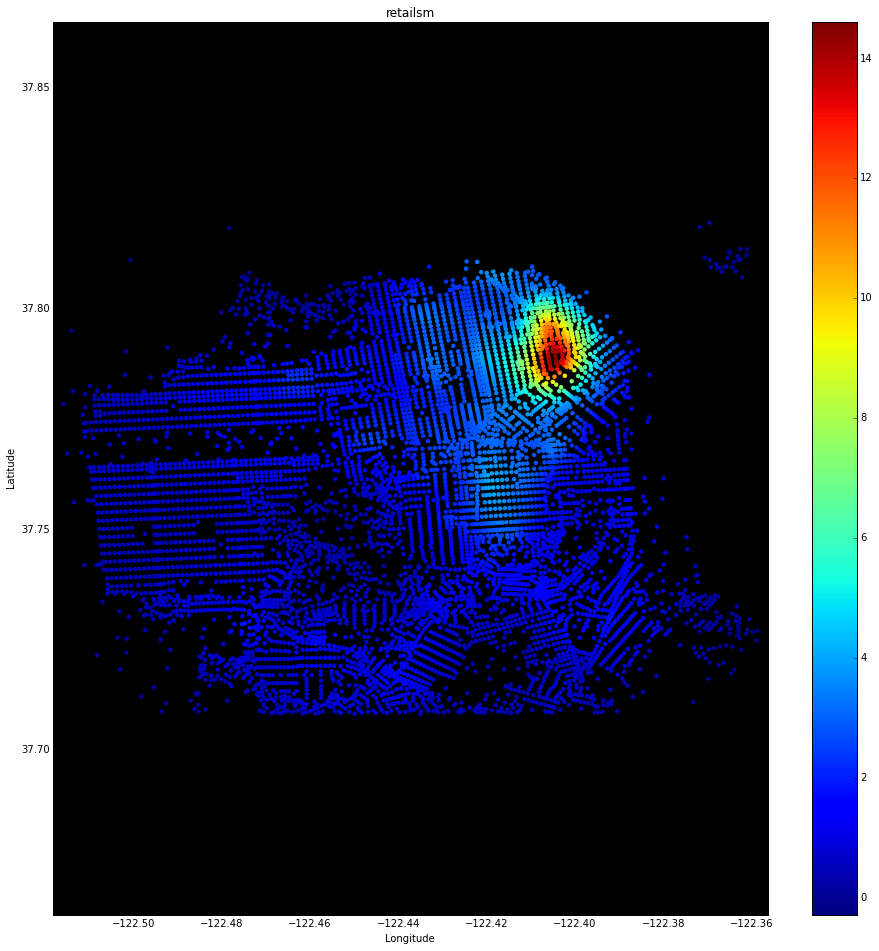

In [39]:
f.plot(['retailsm'])

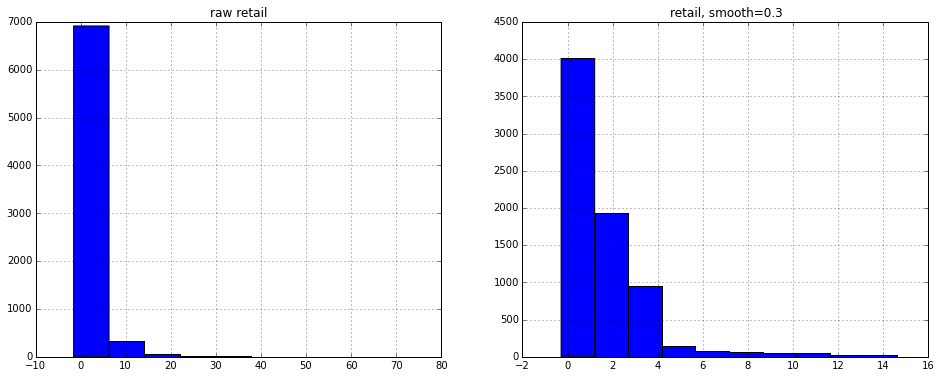

In [40]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
f.features.retail.hist()
plt.title('raw retail')
plt.subplot(122)
f.features.retailsm.hist()
plt.title('retail, smooth=0.3');

# restaurant

In [44]:
rbf = Rbf(f.features.lon, f.features.lat, f.features.restaurant,
          function='linear', smooth=0.01)
f.features['restsm'] = rbf(f.features.lon, f.features.lat)

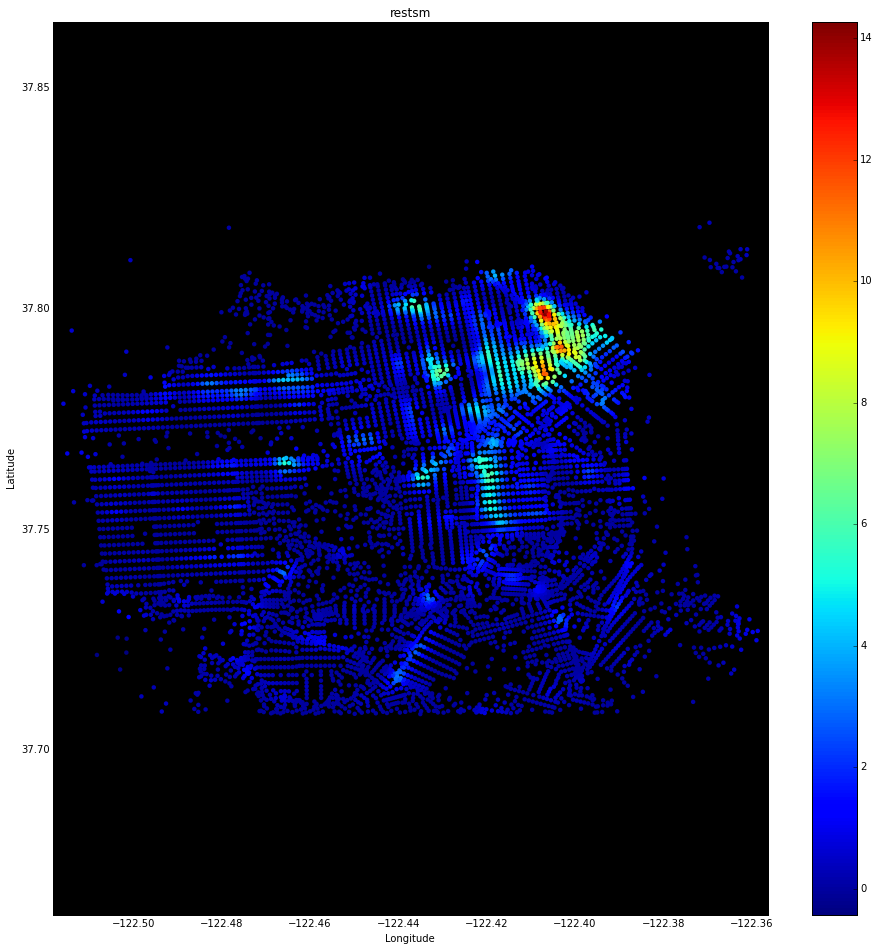

In [45]:
f.plot(['restsm'])

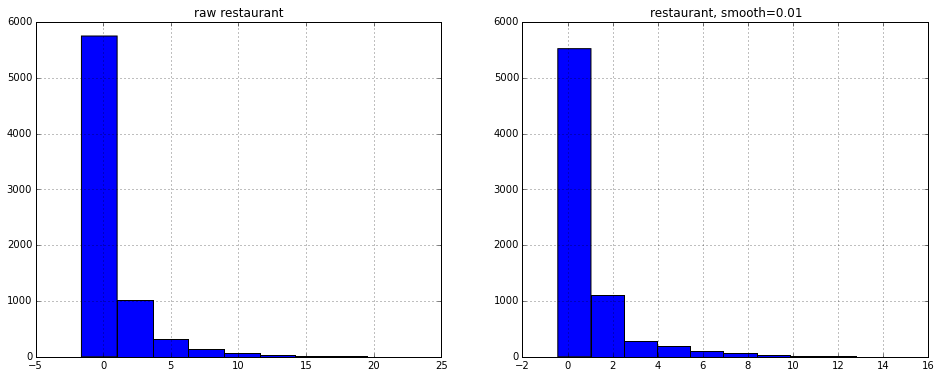

In [47]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
f.features.restaurant.hist()
plt.title('raw restaurant')
plt.subplot(122)
f.features.restsm.hist()
plt.title('restaurant, smooth=0.01');

# grocery

In [121]:
rbf = Rbf(f.features.lon, f.features.lat, f.features.grocery,
          function='linear', smooth=0.1)
f.features['grocerysm'] = rbf(f.features.lon, f.features.lat)

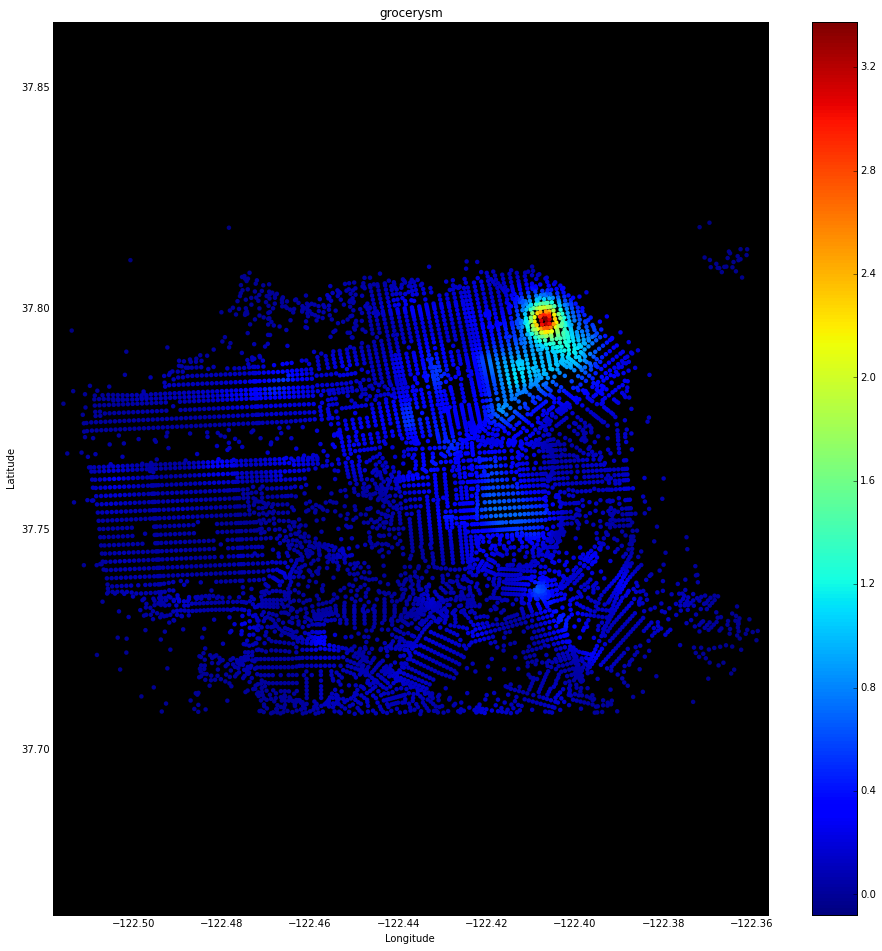

In [124]:
f.plot(['grocerysm'])
# plt.clim(0, 1)

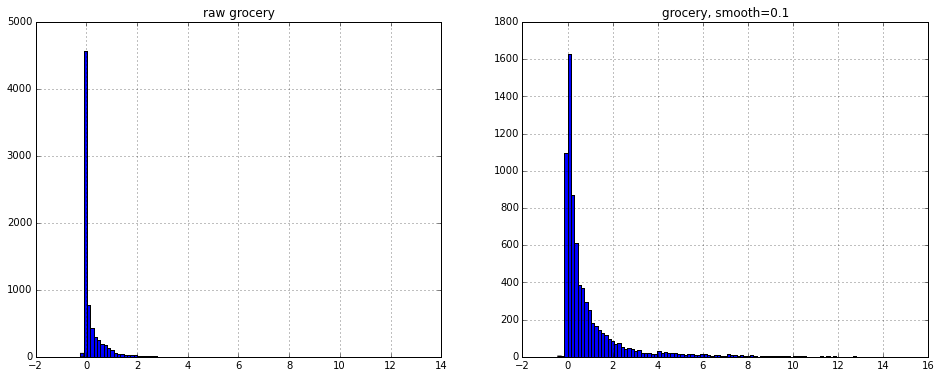

In [126]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
f.features.grocery.hist(bins=100)
plt.title('raw grocery')
plt.subplot(122)
f.features.restsm.hist(bins=100)
plt.title('grocery, smooth=0.1');

# taxable value

In [127]:
f.add_features(['assessment'])

In [139]:
f.features.taxable_value.head()

0    718895.248337
1    834313.797096
2    900225.127625
3    820289.998581
4    776981.611641
Name: taxable_value, dtype: float64

In [145]:
f.features.taxable_value[f.features.taxable_value < 0] = 0

In [154]:
rbf = Rbf(f.features.lon, f.features.lat, np.log(f.features.taxable_value + 1),
          function='linear', smooth=0.01)
f.features['taxsm'] = rbf(f.features.lon, f.features.lat)

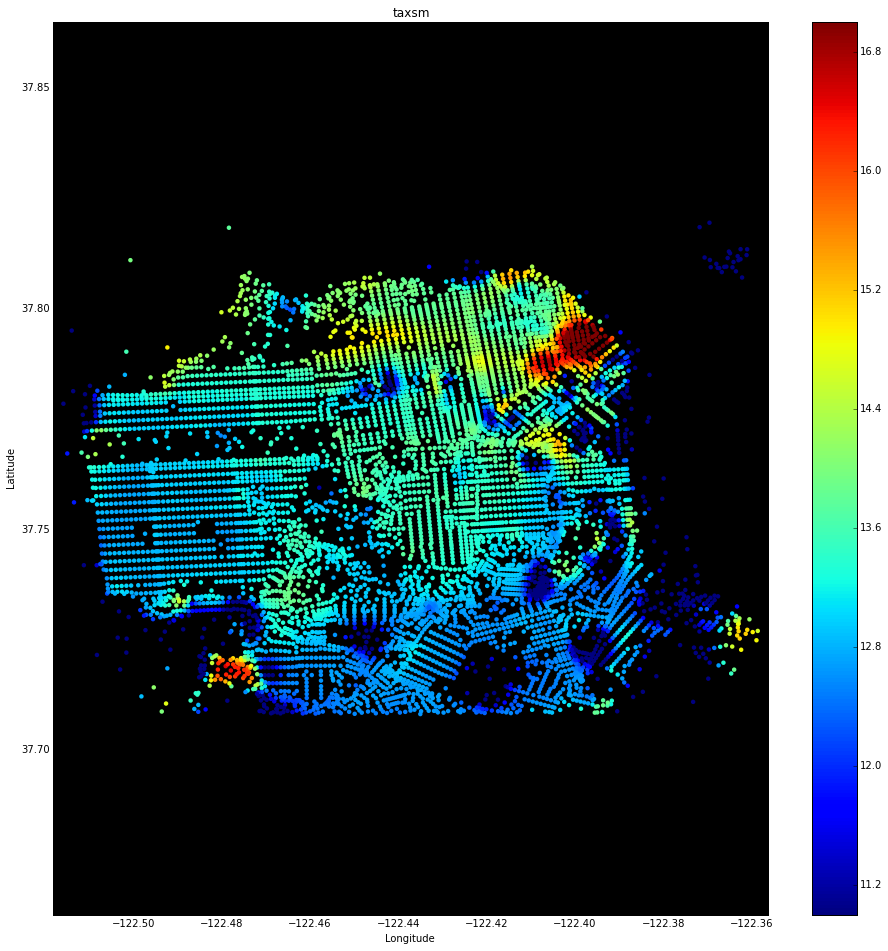

In [157]:
f.plot(['taxsm'])
plt.clim(11, 17)

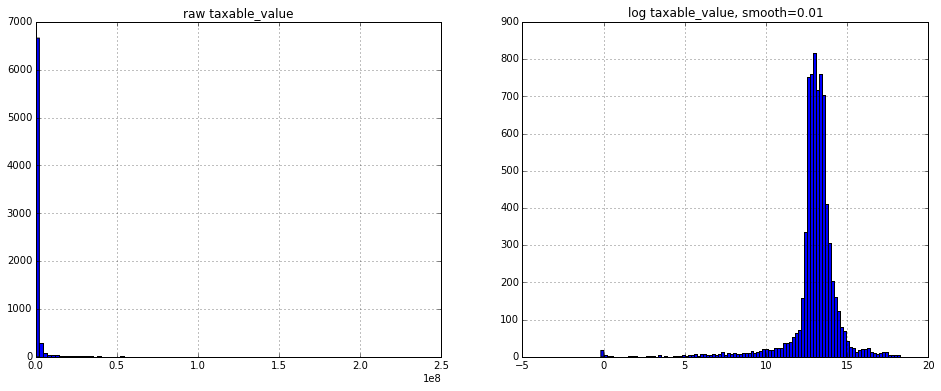

In [160]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
f.features.taxable_value.hist(bins=100)
plt.title('raw taxable_value')
plt.subplot(122)
f.features.taxsm.hist(bins=100)
plt.title('log taxable_value, smooth=0.01');

# Results

* Walkscore: 0 smooth
* Population: 1 smooth
* Household size: 0.1 smooth
* Gender: * population, 0.01 smooth
* Crime: 0.1 smooth
* retail: 0.3 smooth
* restaurant: 0.01 smooth
* grocery: 0.1 smooth
* taxable_value: log and 0.01 smooth


# Test featurizer

In [182]:
from code.featurize import featurizer

In [183]:
f = featurizer()

In [184]:
#f.add_features(f.alltables)
f.features = df.copy()
df = f.features.copy()

In [185]:
f.smooth_features()

taxable_value
grocery
restaurant
retail
ncrimes
sgnf
avg_hh_size
population
walkscore


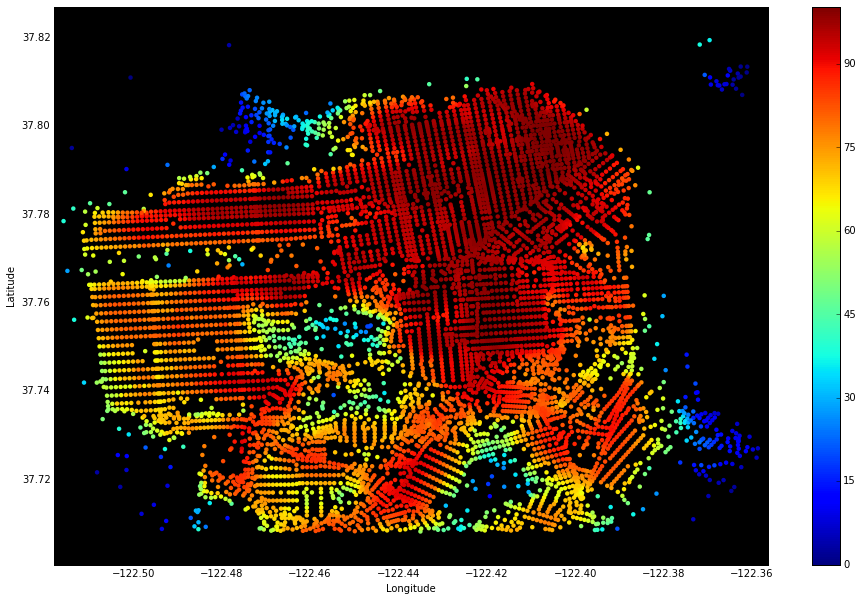

In [195]:
plt.figure(figsize=(16,10))
plt.scatter(f.fsmooth.lon, f.fsmooth.lat,
        c=f.fsmooth.walkscore, linewidths = 0)
plt.colorbar()
plt.axis('equal')
plt.margins(0)
ax = plt.gca()
ax.set_axis_bgcolor('black')
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Scaling

In [197]:
print f.fsmooth.describe()

               lat          lon  taxable_value      grocery   restaurant  \
count  7334.000000  7334.000000    7334.000000  7334.000000  7334.000000   
mean     37.756376  -122.436588      13.011037     0.213572     0.914364   
std       0.027165     0.033026       1.610595     0.292288     1.592221   
min      37.708193  -122.515866      -0.172050    -0.078704    -0.432831   
25%      37.733541  -122.462438      12.710038     0.057818     0.057597   
50%      37.755247  -122.433229      13.131030     0.125844     0.314395   
75%      37.779446  -122.409291      13.592315     0.259117     1.025495   
max      37.819411  -122.358700      18.264996     3.374420    14.263673   

            retail      ncrimes         sgnf  avg_hh_size   population  \
count  7334.000000  7334.000000  7334.000000  7334.000000  7334.000000   
mean      1.740561   379.615394    -0.328798     1.669350   109.443431   
std       1.898435   558.031078     0.280917     0.666420    38.242436   
min      -0.287399 

In [204]:
df = f.fsmooth.copy()
ssc = StandardScaler()
df.iloc[:,2:] = ssc.fit_transform(df.iloc[:,2:])
print df.shape
df.head()

(7334, 11)


lat         lon  taxable_value   grocery  restaurant    retail  \
0  37.750067 -122.441075       0.288994 -0.640949   -0.561362 -0.582297   
1  37.750196 -122.438933       0.336486 -0.576766   -0.465886 -0.515304   
2  37.756794 -122.436270       0.350392 -0.131126   -0.396314 -0.227381   
3  37.753529 -122.437050       0.327277 -0.298948   -0.286766 -0.356888   
4  37.755758 -122.433400       0.355234  0.018376   -0.470065 -0.123353   

    ncrimes      sgnf  avg_hh_size  population  walkscore  
0 -0.509058  0.477959    -0.017894   -0.102338  -0.025533  
1 -0.509038  1.060608     0.253293    0.043369   0.146457  
2 -0.313369  0.276664     0.244508    0.413731   0.701471  
3 -0.456736  0.945703     0.372523    0.260021   0.594762  
4 -0.345027  0.674973     0.360681    0.530529   0.622791

In [206]:
print df.describe()

               lat          lon  taxable_value       grocery    restaurant  \
count  7334.000000  7334.000000    7334.000000  7.334000e+03  7.334000e+03   
mean     37.756376  -122.436588       0.000000 -9.688338e-18 -9.688338e-18   
std       0.027165     0.033026       1.000068  1.000068e+00  1.000068e+00   
min      37.708193  -122.515866      -8.185788 -1.000026e+00 -8.461679e-01   
25%      37.733541  -122.462438      -0.186900 -5.329121e-01 -5.381321e-01   
50%      37.755247  -122.433229       0.074507 -3.001603e-01 -3.768381e-01   
75%      37.779446  -122.409291       0.360934  1.558328e-01  6.980090e-02   
max      37.819411  -122.358700       3.262346  1.081488e+01  8.384652e+00   

             retail       ncrimes          sgnf   avg_hh_size    population  \
count  7.334000e+03  7.334000e+03  7.334000e+03  7.334000e+03  7.334000e+03   
mean  -5.813003e-18  5.813003e-18  9.688338e-18 -8.719505e-18  1.356367e-17   
std    1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+0

taxable_value
grocery
restaurant
retail
ncrimes
sgnf
avg_hh_size
population
walkscore

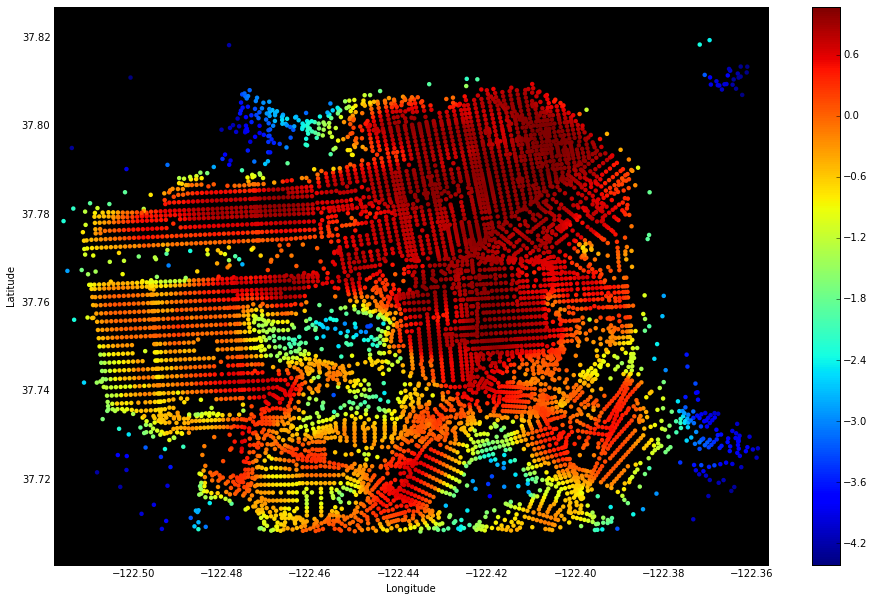

In [217]:
plt.figure(figsize=(16,10))
plt.scatter(f.fsmooth.lon, f.fsmooth.lat,
        c=df.walkscore, linewidths = 0)
plt.colorbar()
plt.axis('equal')
plt.margins(0)
ax = plt.gca()
ax.set_axis_bgcolor('black')
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Full featurizer test

In [ ]:
%%time
f = featurizer()
f.add_features(f.alltables)
f.smooth_features()
f.plot(f.allfeatures)